In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [2]:

stock_symbol = 'AAPL'
start_date = '2023-01-01'
end_date = '2024-01-01'

stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data.ffill(inplace=True)
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.768456  125.070000  130.899994  124.169998  130.279999   
2023-01-04  125.045036  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.718971  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.271103  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.795609  130.149994  133.410004  129.889999  130.470001   

Price          Volume  
Ticker           AAPL  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


In [5]:
stock_data['30_day_MA'] = stock_data['Close'].rolling(window=30).mean()
stock_data['Target'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)
print(stock_data.head())



Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-02-14  151.837173  153.199997  153.770004  150.860001  152.119995   
2023-02-15  153.948242  155.330002  155.500000  152.880005  153.110001   
2023-02-16  152.342667  153.710007  156.330002  153.350006  153.509995   
2023-02-17  151.192978  152.550003  153.000000  150.850006  152.350006   
2023-02-21  147.159180  148.479996  151.300003  148.410004  150.199997   

Price         Volume   30_day_MA      Target  
Ticker          AAPL                          
Date                                          
2023-02-14  61707600  141.118666  155.330002  
2023-02-15  65573800  142.127332  153.710007  
2023-02-16  68167900  143.038999  152.550003  
2023-02-17  59144100  143.956666  148.479996  
2023-02-21  58867200  144.585333  148.910004  


In [7]:

X = stock_data[['Close', '30_day_MA']]
y = stock_data['Target']

train_size = int(0.8 * len(stock_data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (176, 2), Testing set size: (44, 2)


In [9]:

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [0.96916097 0.00962196]
Model Intercept: 3.789073627241578


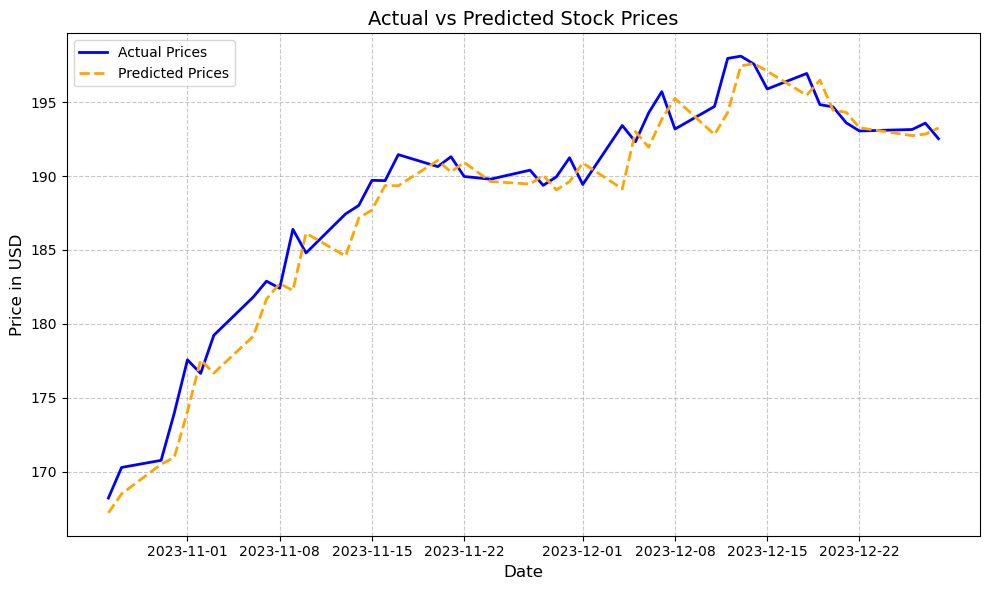

In [11]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_test.index, predictions, label='Predicted Prices', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Stock Prices', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensures no clipping of labels or title
plt.show()


In [13]:

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 1.4505223148761628
Mean Squared Error (MSE): 3.284730114789599


# just for showing (with another bar chart)

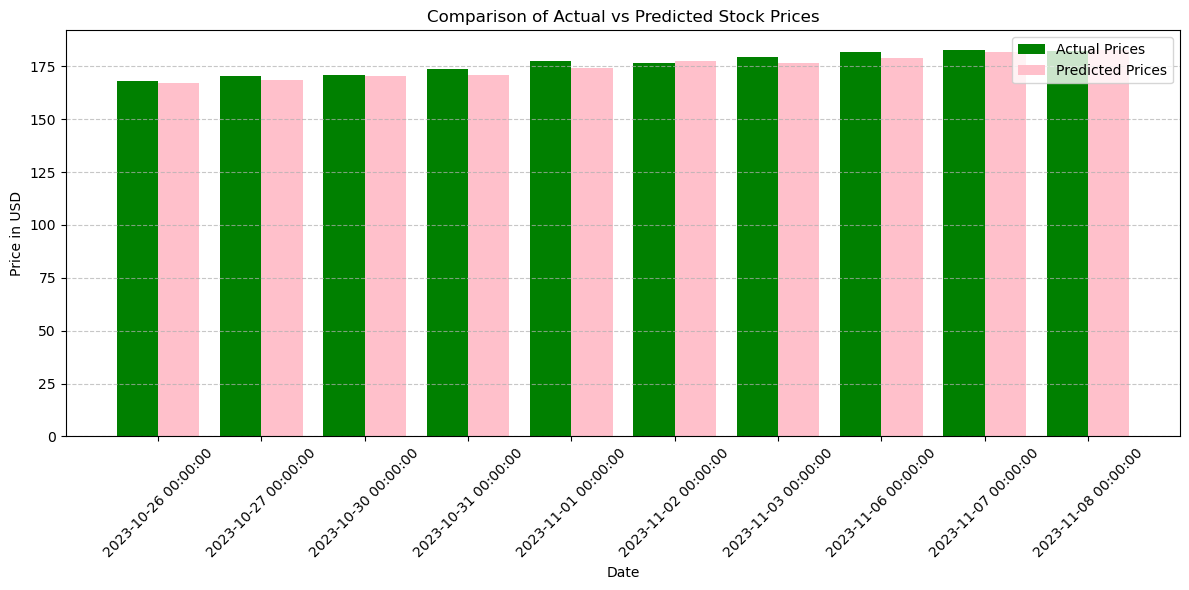

In [23]:
import matplotlib.pyplot as plt


subset_y_test = y_test[:10]
subset_predictions = predictions[:10]
subset_indices = subset_y_test.index

# Create a bar chart
x = range(len(subset_y_test))  # X-axis positions for the bars
bar_width = 0.4  # Width of each bar

plt.figure(figsize=(12, 6))
plt.bar(x, subset_y_test, width=bar_width, label='Actual Prices', color='green', align='center')
plt.bar([pos + bar_width for pos in x], subset_predictions, width=bar_width, label='Predicted Prices', color='pink', align='center')

# Add labels, title, and legend
plt.xticks([pos + bar_width / 2 for pos in x], subset_indices, rotation=45)  # Set the x-axis ticks
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Comparison of Actual vs Predicted Stock Prices')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
